### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Fall 2018 ###

# Production Planning in Manufacturing#

#### Fong Kirst (fchen69@wisc.edu; 9075075516) and Kelly He (xhe228@wisc.edu; 9078291425)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Optional Subsection](#4.A.-Feel-free-to-add-subsections)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

**Production planning** is essential for the management of manufacturing to produce the right number of products to satisfy customer demand over a specific time horizon and maximize profit. Our final project is aiming to match production and sourcing decisions to meet market demand subject to production capacity, workforce availability, and overtime restrictions. 
<br>The objective of the problem is to maximize the profit or minimize the total cost. The best situation is knowing perfect demands ahead. However, in the real world, manufacturing is a complex dynamic system with many uncertain demands.
<br><br>
We attempt to solve production planning problems using two types of mathematical models:<br>
#### A: Deterministic Production Planning Model<br>
In this approach, the demand $t$ for a period of time $t$ is known before manufacturing. The decision variables are the production quantity of the product, the inventory level at the beginning of time $t$, and the indicator (binary variable) of prodcing status in time $t$. In each period of time, we are given the cost of workforce to produce the product, the cost to produce each unit of product, the storage cost, the manufacturing capacity, and the demand. We model and solve the production planning problem by minimizing the total cost. <br>
#### B: Stochastic Production Planning Model<br>
In this approach, the demand $d$ in a period of time is uncertain. However, manufacturing can be carry out by using the best guess demands. We can have a set of probabilities associated with the possible demand to find a solution that is feasible for all or almost all the possible data and optimizes the expected performance of the model.

## 2. Mathematical models ##

### Model A: Deterministic Production Planning (LP & MIP)
 
   1. **Decision variables**
      * $x(t)$ is the production produced in a period time $t$
      * $𝑦(t)$ is the inventory level at the end of each period of time $t$
      * $𝑧(t) \in \{0, 1\}$
         * 1 if production occurs in time $t$
         * 0 otherwise<br><br>
    
   2. **Parameters**
      * $f(t)$ is the workforce cost of producing in time $t$
      * $c(t)$ is the cost of a unit of production in time $t$
      * $h(t)$ is the cost of the storage in time $t$
      * $C(t)$ is the capacity of manufacturing in time $t$
      * $d(t)$ is the demand of the product in time $t$<br><br>
      
   3. **Constraints**
      * Nonnegativity and integer constraints
          * $ x(t), \ y(t)  \ \geq 0 \text{ and } z(t) \ \in \{0, 1\}, \ \forall t \in \{1, 2,..., n\}$ <br><br>
    
      * Capacity constraint
          * $ x(t) \ \leq  \ Cz(t), \ \forall t \ \in \ {1, 2, ..., n}$<br><br>

      * Conservation constraint
          * $ y(t) \ + \ x(t) \ = \ d(t) \ + \ y(t + 1), \ \forall t \in \{1,2,...,n\}$<br><br>
          
   4. **Objective**
    <br>
    $$
    \begin{align}
    \text{Minimize} \qquad
    & \displaystyle\sum_{t \ = \ 1}^n c(t)x(t) \ + \ \displaystyle\sum_{t \ = \ 1}^n f(t)z(t) \ 
    + \ \displaystyle\sum_{t \ = \ 1}^n h(t)y(t) \\
    \text{Subject to} \qquad
    & x(t), y(t),  \ \geq  \ 0, \ z(t) \in \{0, \ 1\}, \\
    & y(t) \ + \ x(t) \ = \ d(t) \ + \ y(t + 1), \ \forall t \in \{1,2,...,n\}
    \end{align}
    $$
 <br>
 
###  Model B:  Stochastic Production Planning Model (MIP)<br>
 
   1. **Decision variables**
    * $r_1,r_2,…,r_m$ are the amounts of raw materials that requried to produce $n$ different products, where $i \ = \ 1, 2, ..., m$ and $r_i \geq 0$.
    * $q_1, q_2,…, q_n$ are the quantities of $n$ different products, where $q_j \geq 0$.<br><br>
     
   2. **Parameters**
    * $ A_{ij}$, to manufacture one unit of product $j$ requires $A_{ij}$ units of raw material $i$, where $r \geq Aq$ and $A$ is nonnegative.
    * $ c \in R_{+}^m$, is the cost for raw material $r$. The total cost is $c^Tr$.
    * $ p \in R_{+}^n$, is the vector of product prices. The total profit is $p^Ts \ - \ c^Tr$.
    * $ \pi_1,\pi_2,...,\pi_k$, are the probabilities of a set of $K$ possible demand vectors $d^{(1)},...,d^{(k)}$, where $1^T\pi = 1, \ \pi \geq 0 $.
    * $s_j \ = \ min\{q_j, \ d_j\}$, is the number of units of product $j$ sold, where $ s_j \geq 0$.
        * If $q_j \gt d_j, \ q_j - d_j $ is the amount of product $j$ produced but not sold. 
        * If $q_j \lt d_j, \ q_j - d_j $ is the amount of unmet demand.
    * $C$ is the manufacturing capacity.<br><br>
    
   3. **Constraints**
    * $ r \geq Aq$, because manufacturing one unit of product $j$ requires at least $A_{ij}$ units of
      raw material $i$.
    * $q \geq 0, \ r\geq 0$. <br><br>
    
   4. **Objective**
    * **Case I**: Choose $r$ and $q$ before the demand $d$ is known<br>
         We incorporate the probabilities of demand into the model and maximize the expected profit.
         $$
         \begin{align}
         \text{Maximize} \qquad
         & -c^Tr \ + \ \sum_{k \ = \ 1}^K \pi_kp^T min\{q,\ d^k\} \\
         \text{Subject to} \qquad
         & r,q \geq 0, \ r \geq Aq, \ k \ =1,...,K
         \end{align}
         $$
         <br><br>
    * **Case II**: Choose $r$ from case I, and then $q$ after $d$ is known<br>
    In this case we have variables $r \ \in \ R_{+}^m \ $ and $ \ q^k \in R_{+}^n, \ k \ = \ 1, ...,K,$ where $q^k$ is the product we produce if $d^k$ turns out to be the actual product demand. <br>
    Then, the objective is to maximize the expected profit.<br>
    $$
    \begin{align}
    \text{Maximize} \qquad
    & -c^Tr  \ + \ \sum_{k \ = \ 1}^K \pi_kp^Tq^k \\
    \text{Subject to} \qquad
    & r, d^k, q^k \geq 0, \ r \geq Aq^k, \ k \ = \ 1,...K
    \end{align}
    $$
  

## 3. Solution ##
#### This solution section implements the two models of the optimization problems.
 - The first model solves the production planning with two senarios of known demands.
 - The second model solves the production planning with unknown demands with from with two cases from two approaches.

### A. Deterministic Production Planning
We are given vectors of workforce cost, unit production cost, storage cost, demands, and maufacturing capacity in time $t = 1, 2, ..., 24$ (month). We choose the produced product quantity in time $t$, the inventory level at the beginning of the time $t$, and production indicater $z$ (1 is on 0 otherwise) as variables to find the optimal solution by minimizing the total cost. 

In [1]:
# Data
raw = readcsv("dpp.csv")

# f(t) -- the workforce cost of producing in time t
f = raw[:, 1][:]

# c(t) -- the cost of a unit of production in time t
c = raw[:, 2][:]

# h(t) -- the cost of the storage in time t
h = raw[:, 3][:]

# C -- the capacity of manufacturing
C = raw[:, 4][:]

# d(t) -- the demand of the product in time t
d1 = raw[:, 5][:]
d2 = raw[:, 6][:]

# Production in a year, i.e. twelve months
t = length(d1)

24

In [2]:
# Deterministic Production Planning Model
using JuMP, Cbc
m = Model(solver = CbcSolver())

# Using First Demand set

@variable(m, x[1:t] >= 0)   # production produced in time t
@variable(m, y[1:t+1] >= 0) # the inventory level at the end of time t
@variable(m, z[1:t], Bin)   # 1 if production occurs in time t, 0 otherwise
@constraint(m, x .<= C.*z)  # production constraints
@constraint(m, y[t+1] == 0) # clear out inventory at the end of production planning

# conservation constraint
@constraint(m, flow[i in 1:t], y[i] + x[i] == d1[i] + y[i+1])
@expression(m, material_cost, sum(c[i].*x[i] for i = 1:t))
@expression(m, storage_cost, sum(h[i]*y[i] for i = 1:t))
@expression(m, labor_cost, sum(f[i]*z[i] for i = 1:t))
@objective(m, Min, material_cost + storage_cost + labor_cost)

status1 = solve(m)

xx1 = getvalue(x)
yy1 = getvalue(y)
zz1 = getvalue(z)
ob1 = getobjectivevalue(m)

# Using second demand set
m = Model(solver = CbcSolver())

@variable(m, x[1:t] >= 0)   # production produced in time t
@variable(m, y[1:t+1] >= 0) # the inventory level at the end of time t
@variable(m, z[1:t], Bin)   # 1 if production occurs in time t, 0 otherwise
@constraint(m, x .<= C.*z)  # production constraints
@constraint(m, y[t+1] == 0) # clear out inventory at the end of production planning

# conservation constraint
@constraint(m, flow[i in 1:t], y[i] + x[i] == d2[i] + y[i+1])
@expression(m, material_cost, sum(c[i].*x[i] for i = 1:t))
@expression(m, storage_cost, sum(h[i]*y[i] for i = 1:t))
@expression(m, labor_cost, sum(f[i]*z[i] for i = 1:t))
@objective(m, Min, material_cost + storage_cost + labor_cost)

status2 = solve(m)

xx2 = getvalue(x)
yy2 = getvalue(y)
zz2 = getvalue(z)
ob2 = getobjectivevalue(m)

print("The first model is ")
print_with_color(:light_blue, status1, "\n")
print("The total minimum cost with demand one is ")
print_with_color(:light_blue,ob1 , "\n")
# println("Month Production Inventory Producing State")
# for i = 1:t
#     print(i, "\t", round(xx[i], 1), "\t\t", round(yy[i], 1) , "\t\t", round(zz[i], 1), "\n")
# end
print("The second model is ")
print_with_color(:light_blue, status2, "\n")
print("The total minimum cost with demand two is ")
print_with_color(:light_blue,ob2 , "\n")

The first model is Optimal
The total minimum cost with demand one is 3.4077e7
The second model is Optimal
The total minimum cost with demand two is 2.64138e7


### B.  Stochastic Production Planning 

### First Approach
In this approach, we use the possible demands with associated probabilities to set the upper bound of the production.

#### Case I: Choose $r$ and $q$ ahead, before the demand $d$ is known

In this case the demands is unknown. We solve the problem by setting the maximum producing quantities of different products to the possible demand times associated probabilities to prevent over producing. After solving the number of raw materials to purchase and the quantities of products to produce, we then compute the expected profit by using the possible sold quantities of products from different buyers. 
<br>

In [44]:
# Data
raw2 = readcsv("spp.csv")
(a, b) = size(raw2)
unit_material = 5:9
demand = 10:b

# M -- number of raw materials
M = 10

# N -- number of products
N = 5

# π -- the probability of a set of the possible demand vectors
π = raw2[:,1][:]

# K -- number of possibility vectors 
K = length(π)

# c -- the cost for raw material r.
c = raw2[:,2][:]
c = c[1:M]

# p -- the vector of product prices
p = raw2[:,3][:]
p = p[1:N]

# C -- the manufacturing capacity
Cap = raw2[:,4][:]
Cap = Cap[1:N]

# A -- units of raw material i needed for one unit of product j
A = raw2[:, unit_material]
A = A[1:10,1:5]

# possible demand vectors associated with the probabilities
D = raw2[:, demand]
D = D'

5×15 Array{Any,2}:
 20  11  11  18  12  14  11  15  14  12  13  12  12  14  30
 15  13  14  17  20  12  14  12  11  14  11  13  11  11  17
 20  14  13  12  12  14  16  18  13  12  13  16  12  16  10
 18  12  15  12  18  18  12  18  14  15  14  14  12  14  30
 12  15  11  15  17  13  11  13  19  12  19  10  13  18  16

In [4]:
# Undeterministic Production Planning Model Case I
using JuMP, Cbc, Gurobi
m = Model(solver = CbcSolver())

# stage one
# produce products based on possible demand
@variable(m, r[1:M] >= 0) # amount of each raw material to buy
@variable(m, q[1:N] >= 0) # amount of each product to manufacture
@constraint(m, r .>= A*q) # material constraint
@constraint(m, q .<= D*π)
@constraint(m, q .<= Cap)
@expression(m, cost, c.*r)
@expression(m, revenue, sum(p[i]*q[i] for i = 1:N))
@objective(m, Max, -sum(cost) + revenue)
status1 = solve(m)

q1 = getvalue(q)
r1 = getvalue(r)
o1 = getobjectivevalue(m)

# statge two 
# we will use the r and q from stage one to compute expected profit
# Computes Expected Profit
R = ones(1, K)
S = zeros(N, M)
Q = q1*R
# sj = min{qj, dj} -- the number of units of product j sold
    # If  qj>dj, qj−dj -- the amount of product j produced but not sold.
    # If  qj<dj, qj−dj -- the amount of unmet demand.
S = min.(Q, D)
exp_pr = -sum(c.*r1) + sum(p'*q1)
profit = -sum(c.*r1) + sum(p'*S*π)

println("The number of materials to buy:")
print_with_color(:light_blue, r1, "\n\n")
print("The number of products to produce: ")
print_with_color(:light_magenta, q1, "\n\n")
print("The expected profit is: ")
print_with_color(:light_blue, round(exp_pr, 2), "\n\n")
print("The actual profit is: ")
print_with_color(:light_blue, round(profit, 2))

The number of materials to buy:
[10.4909, 15.4897, 18.4748, 15.5662, 16.8254, 9.7724, 13.6218, 11.8782, 14.6147, 17.9856]

The number of products to produce: [14.94, 13.48, 14.05, 16.04, 14.36]

The expected profit is: 2934.58

The actual profit is: 2668.8

#### Case II: Choose $r$ ahead of time, and $q$ after $d$ is known

In this case, we use the possible sold quantites computed from case I as production goal to find the proper amount of raw materials to purschase. So that we don't over purchase raw materials or over produce products.

In [48]:
# Undeterministic Production Planning Model Case II
using JuMP, Cbc, Clp, Gurobi
m = Model(solver = CbcSolver())

@variable(m, r[1:M] >= 0)
@variable(m, q[1:N] >= 0) # product to manufacture for each demand
@constraint(m, r .>= A*q)
@constraint(m, q .== S*π)
@expression(m, revenue, sum(p[i]*q[i] for i = 1:N))
@objective(m, Max, revenue - c'*r)

status2 = solve(m)

q2 = getvalue(q)
r2 = getvalue(r)
o2 = getobjectivevalue(m)

println("The number of materials to buy:")
print_with_color(:light_blue, r2, "\n\n")
print("The number of products to produce: ")
print_with_color(:light_magenta, q2, "\n\n")
print("The actual and expected profit is: ")
print_with_color(:light_blue, round(profit, 2))

The number of materials to buy:
[9.50146, 14.0335, 16.6956, 13.9947, 15.0694, 8.79077, 12.2687, 10.7491, 13.2293, 16.2504]

The number of products to produce: [13.1238, 12.4712, 12.9875, 14.2936, 13.0792]

The actual and expected profit is: 2668.8

### Second Approach

In this approach, we generates a vector of five elements having values between one and two inclusive to set the upper bound and lower bound of production. 

#### Case I: Choose $r$ and $q$ ahead, before  the  demand $d$ is known

In [37]:
# generates a random vector with five elements 
temp1 = rand(1:2,1,N)

# Undeterministic Production Planning Model Case I

using JuMP, Cbc
m = Model(solver = CbcSolver())

@variable(m, r[1:M] >= 0) # amount of each raw material to buy
@variable(m, q[1:N] >= 0) # amount of each product to manufacture
@constraint(m, r .>= A*q) # material constraint
@constraint(m, q .<= Cap)

# randomly generates the quantity of each q
for i in 1:N
    if temp1[i] == 1
      #upper bound
      @constraint(m, sum(q[i]) >= sum(D[i,:] .* π))
    else
      #upper bound
      @constraint(m, sum(q[i]) <= sum(D[i,:] .* π))
      #lower bound
      @constraint(m, sum(q[i]) >= sum(D[i,:] .* π *0.5)) 
    end
end

@expression(m, cost, c.*r)
@objective(m, Max, -sum(cost) + sum(p.*q))
solve(m)

qq1 = getvalue(q)
rr1 = getvalue(r)
oo1 = getobjectivevalue(m)
SS = min.(q1*ones(1,K), D)

5×15 Array{Float64,2}:
 14.94  11.0   11.0   14.94  12.0   …  13.0   12.0   12.0  14.0   14.94
 13.48  13.0   13.48  13.48  13.48     11.0   13.0   11.0  11.0   13.48
 14.05  14.0   13.0   12.0   12.0      13.0   14.05  12.0  14.05  10.0 
 16.04  12.0   15.0   12.0   16.04     14.0   14.0   12.0  14.0   16.04
 12.0   14.36  11.0   14.36  14.36     14.36  10.0   13.0  14.36  14.36

#### Case II: Choose $r$ ahead of time, and $q$ after $d$ is known

In [59]:
using JuMP, Cbc, Gurobi
m = Model(solver = CbcSolver())
@variable(m, r[1:M] >= 0)
@variable(m, q[1:N] >= 0) #quantity of n products to be produced
@constraint(m, r .>= A*q2)    #material constraint
@constraint(m, q .<= Cap)   # capacity constraint
@constraint(m, q .== SS*π) #use S_graph here to keep S from changing in order to have better discussion
@expression(m, cost, c.*r)   
@objective(m, Max, -sum(cost) + sum(p.*q))
solve(m)

qq2 = getvalue(q)
rr2 = getvalue(r)
oo2 = getobjectivevalue(m)

println("The number of materials to buy:")
print_with_color(:light_blue, "\t", round.(rr2, 2), "\n\n")
print("Quantity of products we should produce: ")
print_with_color(:light_magenta, round.(qq2, 2),"\n")
print("The expected profit: ")
print_with_color(:red, round(oo2, 2),"\n")

print("The actual profit: ")
print_with_color(:green, round(-sum(c.*rr2) + p'*qq2), 2)

The number of materials to buy:
	[9.5, 14.03, 16.7, 13.99, 15.07, 8.79, 12.27, 10.75, 13.23, 16.25]

Quantity of products we should produce: [13.12, 12.47, 12.99, 14.29, 13.08]
The expected profit: 2669.5
The actual profit: 2670.02

## 4. Results and discussion ##

### A. Deterministic Production Planning Model

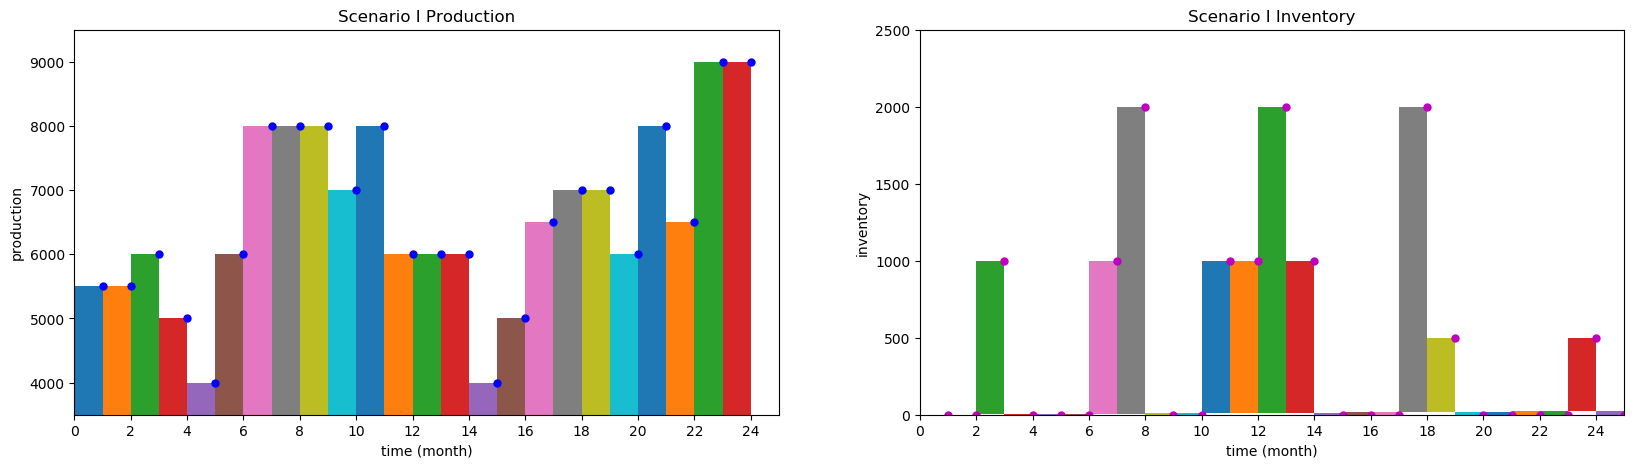

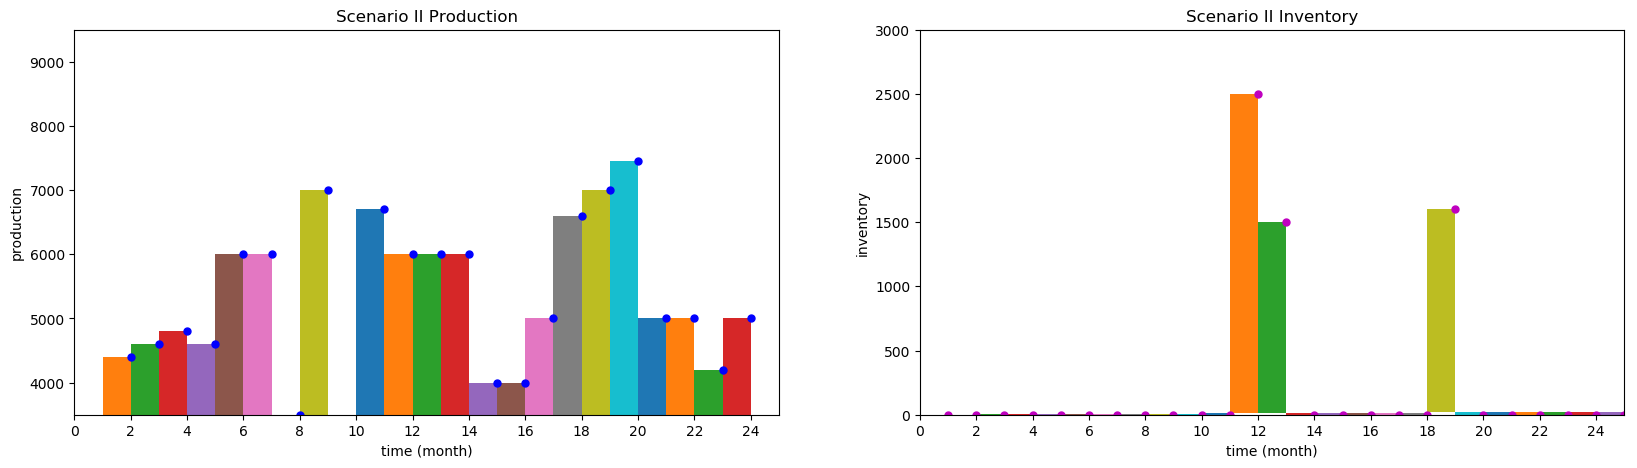

In [271]:
using PyPlot
t1 = 1:24
t2 = 1:25
figure(figsize = (20, 5))
subplot(1, 2, 1)
plot(t1, xx1, "b.", markersize = 10)
xticks(0:2:24)
yticks(0:1000:9500)
axis([0,25,3500,9500])
xlabel("time (month)")
ylabel("production")
title("Scenario I Production")
for i in t1
    a = [i-1, i-1, i, i]
    b = [i-1, xx1[i], xx1[i], i-1]
    fill(a, b)
end

subplot(1, 2, 2)
plot(t2, yy1, "m.", markersize = 10)
xticks(0:2:24)
yticks(0:500:2500)
axis([0,25,0,2500])
xlabel("time (month)")
ylabel("inventory")
title("Scenario I Inventory")
for i in t2
    a = [i-1, i-1, i, i]
    b = [i-1, yy1[i], yy1[i], i-1]
    fill(a, b)
end

figure(figsize = (20, 5))
subplot(1, 2, 1)
plot(t1, xx2, "b.", markersize = 10)
xticks(0:2:24)
yticks(0:1000:9500)
axis([0,25,3500,9500])
xlabel("time (month)")
ylabel("production")
title("Scenario II Production")
for i in t1
    a = [i-1, i-1, i, i]
    b = [i-1, xx2[i], xx2[i], i-1]
    fill(a, b)
end

subplot(1, 2, 2)
plot(t2, yy2, "m.", markersize = 10)
xticks(0:2:24)
yticks(0:500:3000)
axis([0,25,0,3000])
xlabel("time (month)")
ylabel("inventory")
title("Scenario II Inventory")
for i in t2
    a = [i-1, i-1, i, i]
    b = [i-1, yy2[i], yy2[i], i-1]
    fill(a, b)
end

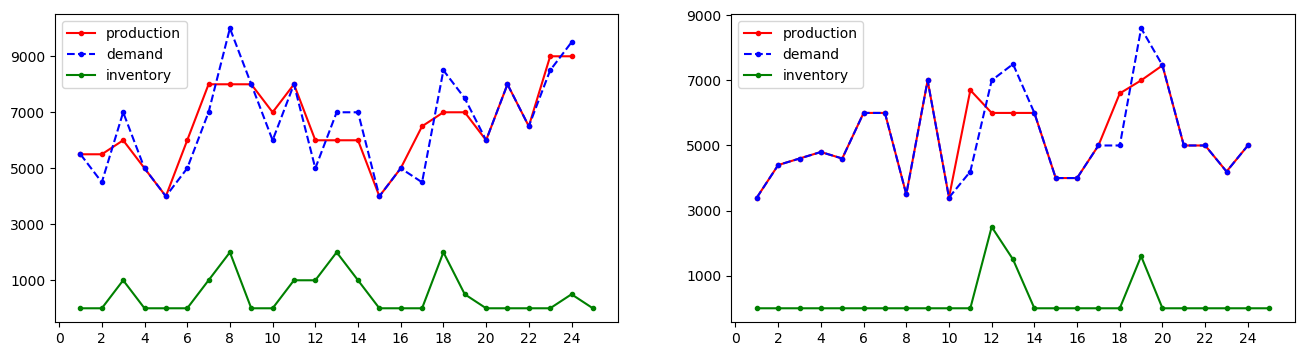

In [270]:
using PyPlot
# production with demand one
figure(figsize = (16, 4))
subplot(1, 2, 1)
plot(t1, xx1, "r.-")
plot(t1, d1, "b.--")
plot(t2, yy1, "g.-")
xticks(0:2:24)
yticks(1000:2000:9500)
legend(["production", "demand", "inventory"], loc = "best");

# production with demand two
subplot(1, 2, 2)
plot(t1, xx2, "r.-")
plot(t1, d2, "b.--")
plot(t2, yy2, "g.-")
xticks(0:2:24)
yticks(1000:2000:9500)
legend(["production", "demand", "inventory"], loc = "best");

### B. Stochastic Production Planning Model
### First Approach

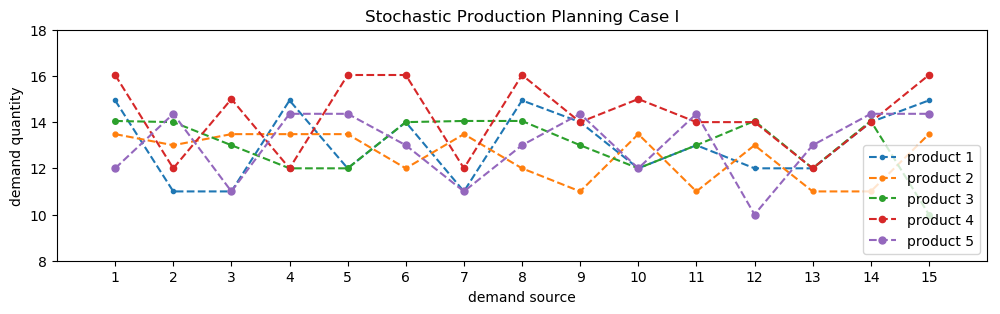

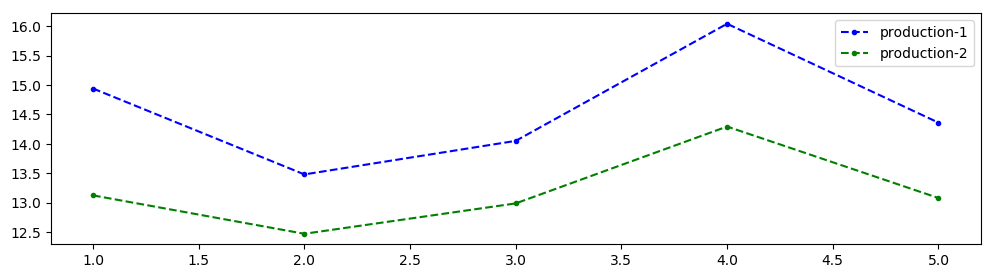

PyObject <matplotlib.legend.Legend object at 0x12daa74d0>

In [66]:
using PyPlot
figure(figsize = (12, 3))
x = 1:K
for i = 1:5
    plot(x, S[i, :], ".--", markersize = (5 + i))
end
xticks(1:1:15)
#yticks(8:3:18)
axis([0,16,8,18])
xlabel("demand source")
ylabel("demand quantity")
title("Stochastic Production Planning Case I")
legend(["product 1","product 2","product 3","product 4","product 5"])

figure(figsize = (12, 3))
n = 1:N
plot(n, q1, "b.--")
plot(n, q2, "g.--")
legend(["production-1", "production-2"], loc = "best")

### Second Approach 

In [61]:
print("The cost of each product: ")
for i in 1:N
    print_with_color(:light_red, round((c.*rr1)[i], 2), " ")
end
print("\nThe unit profit of each product: ")
for i in 1:N
    print_with_color(:light_blue,round(p[i]-(c.*rr1)[i], 2), " ")
end

print("\nThe profit of each product:")
for i in 1:N
    print_with_color(:green, round(-(c.*rr1)[i] + qq1[i]*p[i], 2), " ")
end
println()
print("The number of materials to buy: ")
print_with_color(:light_blue, round.(rr1, 1), "\n")
print("The number of products to produce: ")
print_with_color(:light_magenta, round.(qq1, 2), "\n")
print("The expected profit: ")
print_with_color(:light_blue, round(oo1, 2), "\n")
print("The actual profit: ")
print_with_color(:green, round(-sum(c.*r1) + sum(p .*S*π), 2))

The cost of each product: 3.42 7.87 1.66 6.1 1.65 
The unit profit of each product: 31.58 42.13 58.34 17.9 34.35 
The profit of each product:3496.58 4992.13 5998.34 378.86 4318.35 
The number of materials to buy: [67.1, 89.4, 127.9, 88.4, 110.0, 54.7, 82.3, 66.6, 90.2, 81.9]
The number of products to produce: [100.0, 100.0, 100.0, 16.04, 120.0]
The expected profit: 19162.75
The actual profit: 2668.8

**Observation: ** <br>
 
| No. | Random no.     | Quantity of Product               | Expected Profit | Actual Profit|
| --- | :------------  |:-------------:                    | -----:          |--------------|
|  1  |2  2  2  1  2   |[14.0, 13.0, 14.0, 120.0, 14.0]    |\$5345.74        |\$2652.11     |
|  2  |1  2  2  2  2   |[100.0, 13.0, 14.0, 16.0, 14.0]    |\$5860.99        |\$2683.57     |
|  3  |2  2  2  2  1   |[14.0, 13.0, 14.0, 16.0, 120.0]    |\$6667.10        |\$2663.43     |
|  4  |2  1  2  2  2   |[14.0, 100.0, 14.0, 16.0, 14.0]    |\$7203.99        |\$2675.12     |
|  5  |2  2  1  2  2   |[14.0, 13.0, 100.0, 16.0, 14.0]    |\$8012.56        |\$2677.49     |
|  6  |2  1  2  1  2   |[14.0, 100.0, 14.0, 120.0, 14.0]   |\$9688.78        |\$2706.15     |
|  7  |1  1  2  2  1   |[100.0, 100.0, 14.0, 16.0, 120.0]  |\$14010.18       |\$2779.96     |
|  8  |2  2  1  1  1   |[14.0, 13.0, 100.0, 120.0, 120.0]  |\$14303.50       |\$2750.87     |
|  9  |2  1  1  1  2   |[14.0, 100.0, 100.0, 120.0, 14.0]  |\$14840.39       |\$2762.56     |
|  10 |1  1  1  2  2   |[100.0, 100.0, 100.0, 16.0, 14.0]  |\$15355.64       |\$2794.02     |
|  11 |1  1  1  2  1   |[100.0, 100.0, 100.0, 16.0, 120.0] |\$19162.75       |\$2668.80     |
|  12 |1  1  1  1  1   |[100.0, 100.0, 100.0, 120.0, 120.0]|\$21646.59       |\$2867.41     | 

By observation, forcing all five products to have the constraint @constraint( $m, q$ .>= $D*π$) does yield the maximized profit. We can notice that product 3 plays an important role in getting the maximized profit, followed by product 2. We also observe that even though the quantity of product 1 only fluctuate between 2 and 3, it is a key to obtain a larger profit. For example in case 9 and 10, although the quantity of product 4 drops from 120 to 16, the profit increases only because the quantity of product 1 increases while the quantities of other three products remain the same. <br>
In addtion, the difference between expected profit and actual profit is quite large, about 10000. This shows that since we produce much more than demand, which will be a waste of raw materials. 


** Explanation:** <br>
    We have tried a couple ways to modify this model to make it reasonable. <br>
* First, we used $min(q,D)$ in either the objective or constraint to calculate the number of products sold. But it gave us an error since even though we made a guess on demand $(d)$,(i.e. we gave it some random numbers), we still had a JuMP variable q. Clearly, Julia does not allow to calculate a min with a variable in general. <br>
* Then, we changed to plan 2. We then simply added a new constraint: @constraint( $m, q$ .>= $D*π$). This did give us some numbers, but the result was not quite reasonable-- simply making $q$ == $D*π$. Thus, q variable here seemed useless.We also went to the TA and he gave us some ideas to hopefully get min value by indirectly calculating the min. But this did not work as well.<br>
* Next, we came out an idea. We slighty changed the constraint. Instead of forcing q == D*π, we randomly generated 5 values and assigned each product with either 1 or 2. Products with 1 will simply have the constraint @constraint( $m, q$ .>= $D*π$) and for those have 2, they will have the following two constraints so that not all of the products will have same constraint:  <br>
     
      #upper bound
      @constraint(m, sum(q[i]) <= sum(D[i,:] .* π))
      #lower bound
      @constraint(m, sum(q[i]) >= sum(D[i,:] .* π *0.5)) 
    
   The reason we set the lower bound is because we do not want them to be zero. <br>
   It turned out that this idea worked and the results were reasonable. Products which have negative profit values with just one unit, will be made less than those with positive profit values. And the product which has the most one-unit profits, will be made the most. 

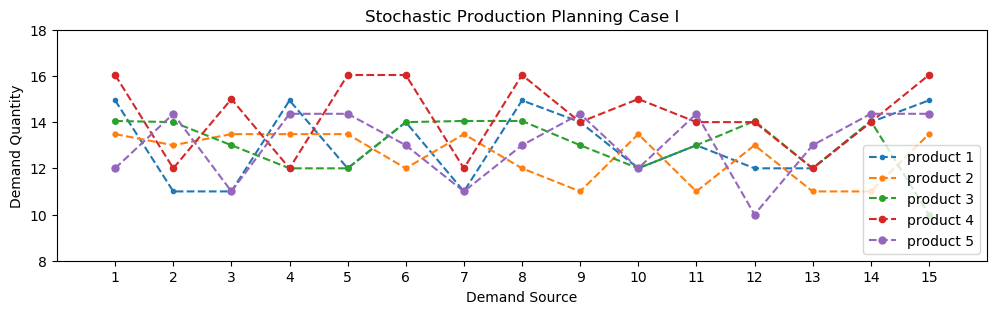

PyObject <matplotlib.legend.Legend object at 0x12d84a290>

In [65]:
using PyPlot
figure(figsize = (12, 3))
x = 1:K
for i = 1:5
    plot(x, SS[i, :], ".--", markersize = (5 + i))
end
xticks(1:1:15)
axis([0,16,8,18])
xlabel("Demand Source")
ylabel("Demand Quantity")
title("Stochastic Production Planning Case I")
legend(["product 1","product 2","product 3","product 4","product 5"])

Explanation: 
For part 2 case 2, we used S(minimum of quantity(q) and Demand(D)) we derived in part 2 case 1. From case 1, we know that quantity of each product is managed to make the optimal profit with the number of raw material needed is unknown. Thus, for part 2, since the true demand is known, we compute the optimal profit. 
The purpose of case 2 is to see if we force quantity of products(q) to be equal to Sπ, which is the true demand, what will happen to the expected profit and actual profit. The result is that the difference between those profit is about 200 which is much smaller than that in case 1. The main possible is because we sometimes get lower value than Dπ. For example in case 1, if some of q values are small than that of D, we will end up getting qπ. And this time, even though we force q2 = Sπ, similarly, we will have q2 = q1ππ.

### Graph Interpreation
[Since value of q is different each time, we choose one of the value and save it to continue our discussion of the graph] <br><br>
From the graph above, product 1 and 4 fluctuate more than the other three products. Product 1 reaches the lowest demand quantity at Demand Source = 3, and reaches maxima at Demand Source = 15. This happens is becuase to maintain the higher possible profit, the larger amount of raw materials is needed. Therefore, it is not pratical to produce a larger amount. 

## 5. Conclusion ##

For part 2, we find that the expectation we had for stage 2 based on stage 1 does not really match the result we got in the end. Even though the fact that product 3 has the highest hierarchy in production is not surprised, the results for other products are totally different. To find out why this is happening, we might build more models with different situations. For example, we may add more constraints such as overtime labor or production time and see what will happen to quantity of these products. 